In [1]:
#Real estate project

In [2]:
import pandas as pd

In [3]:
housing=pd.read_csv('data.csv')

In [4]:
housing.head() #top 5 row

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
housing.info() #information,if missing data ,so take decision according to missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
housing['CHAS'].value_counts() #info about data,how much value

0    471
1     35
Name: CHAS, dtype: int64

In [7]:
housing.describe() #complete detail about data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.285691,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.698284,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
matplotlib inline

In [9]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000231715B1AC8>,
      dtype=object)

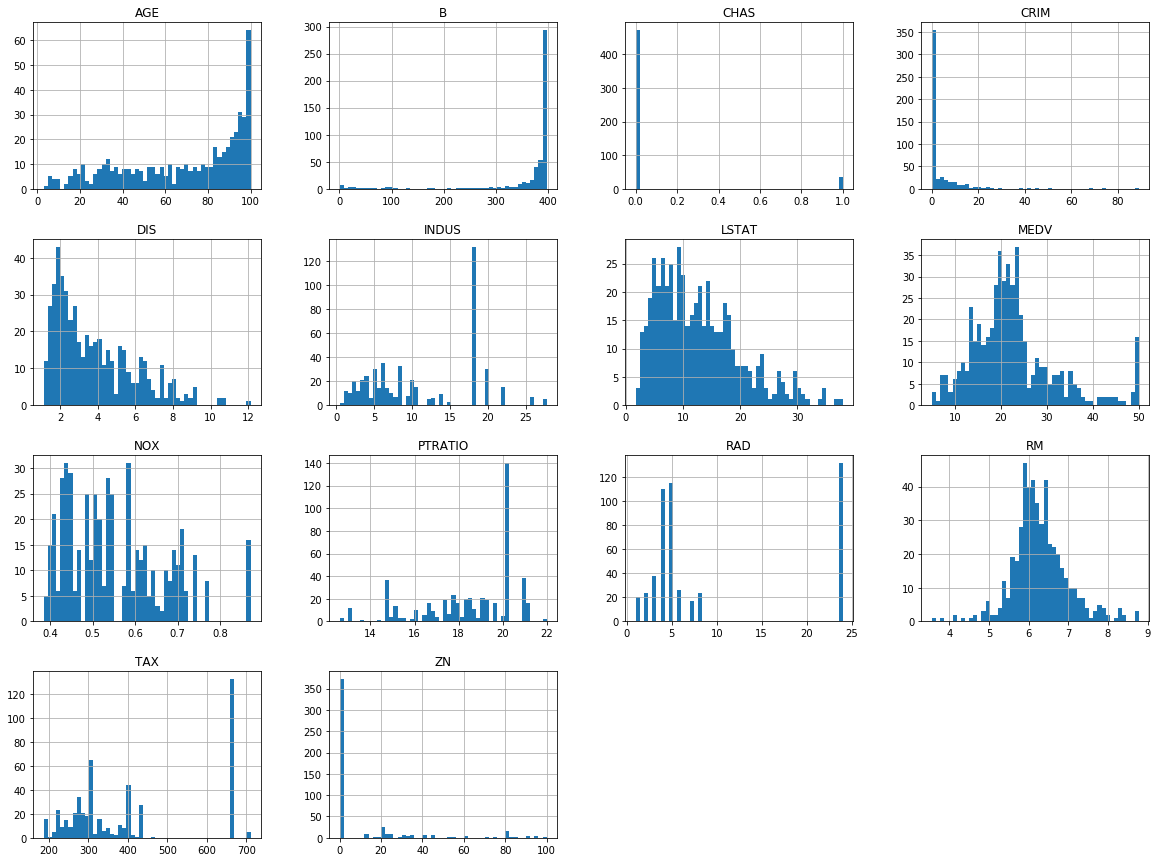

In [10]:
housing.hist(bins=50,figsize=(20,15))

In [11]:
#train test splitting

In [12]:
# For learn
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:] 
    return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
#train_set, test_set = split_train_test(housing, 0.2)

In [14]:
# print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

In [15]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 404
Rows in test set: 102



In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [17]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [18]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [19]:
housing=strat_train_set.copy()

In [20]:
#corelation

In [21]:
corr_matrix=housing.corr()

In [22]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.677016
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000231715A2388>,
      dtype=object)

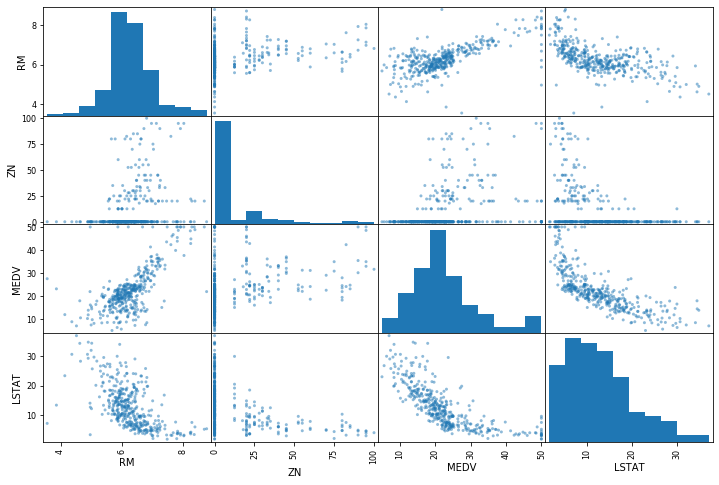

In [23]:
from pandas.plotting import scatter_matrix
attributes=['RM',"ZN","MEDV","LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))

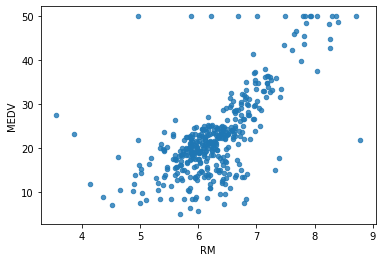

In [24]:
 housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

In [25]:
#attribute combination

In [26]:
housing['TAXRM']=housing['TAX']/housing['RM']

In [27]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [28]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.677016
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.524004
LSTAT     -0.740494
Name: MEDV, dtype: float64

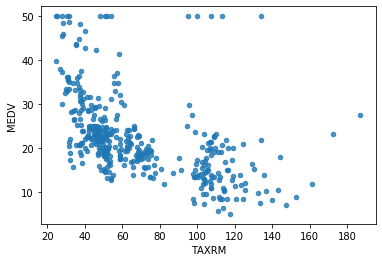

In [29]:
 housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.8)

In [30]:
housing=strat_train_set.drop("MEDV",axis=1)
housing_lables=strat_train_set["MEDV"].copy()

In [31]:
#missing attributes to take care missing attributes
#1-get rid of the missing
#2. get rid of the whole attribute
#3. set value (0 or mean or median)

In [32]:
a=housing.dropna(subset=['RM']) #opt 1
a.shape

(399, 13)

In [33]:
housing.drop('RM',axis=1) #option 2 drop column

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,86.5,2.4358,24,666,20.2,50.92,18.13


In [34]:
housing.drop('RM',axis=1).shape

(404, 12)

In [35]:
median=housing["RM"].median()

In [36]:
housing['RM'].fillna(median) #fiil median in blank cell #opt3

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [37]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281175,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.707753,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.879500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.216000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [38]:
from sklearn.impute import SimpleImputer

In [39]:
imputer=SimpleImputer(strategy='median')
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [40]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21600e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [41]:
imputer.statistics_.shape

(13,)

In [42]:
X=imputer.transform(housing)

In [43]:
housing_tr=pd.DataFrame(X,columns=housing.columns)

housing_tr.describe()

## scikit learn design
three types of the objects
1. estimatore-it estmates some parameter based on dataset.
eg-Imputer-it has a  fit method and transform method.
Fit method-fits the dataset and calculates internal parameters

2. Tranfomers-transform method takes input and return output based on learning from the fit().It also has a convenience function cllled fit_transform() which fits and thn tranforms.

3. Predictors-LinearRegression model is an eample of predictor. fits() and predict() are two common functions.It also gives score() functions which will evaluate the predictions


## feature scaling

primarily,two types of feature scaling methods:
1.Min-Max scaling(normalisation)
value-min/max-min
sklearn provides a class called MinMaxScaler for this
2.standardisation
value-mean/std
sklearn provide a class standard scaler for this



## creating pipeline

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scalar',StandardScaler()),
                    ])


In [45]:
housing_num_tr=my_pipeline.fit_transform(housing)

In [46]:
housing_num_tr.shape

(404, 13)

## select model for the data

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model=LinearRegression()
# model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_num_tr,housing_lables)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [48]:
some_data=housing.iloc[:5]

In [49]:
some_labels=housing_lables.iloc[:5]

In [50]:
prepared_data=my_pipeline.transform(some_data)

In [51]:
model.predict(prepared_data)

array([22.345, 25.469, 16.435, 23.325, 23.491])

In [52]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

 ## evaluating the model

In [53]:
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
mse=mean_squared_error(housing_lables,housing_predictions)
rmse=np.sqrt(mse)

In [54]:
rmse

1.2805126419671238

## using better evaluation technique-Cross Validation

In [55]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_lables,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [56]:
rmse_scores

array([3.03443397, 2.91124029, 4.51913204, 2.502894  , 3.28223823,
       3.01664499, 4.70780786, 3.24708325, 2.95680363, 3.66316415])

In [57]:
def print_scores(scores):
    print("Scores:",scores)
    print("mean :",scores.mean())
    print("Standard deviation:",scores.std())

In [58]:
print_scores(rmse_scores)

Scores: [3.03443397 2.91124029 4.51913204 2.502894   3.28223823 3.01664499
 4.70780786 3.24708325 2.95680363 3.66316415]
mean : 3.3841442413916347
Standard deviation: 0.6773122231306411


In [59]:
from joblib import dump,load
dump(model,'real_estates_data.joblib')

['real_estates_data.joblib']

## model testing

In [60]:
X_test=strat_test_set.drop("MEDV",axis=1)
Y_test=strat_test_set["MEDV"].copy()
X_test_prepared=my_pipeline.transform(X_test)
final_predictions=model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
print(final_predictions)
print("**********")
print(list(Y_test))

[24.549 11.132 25.587 21.653 18.308 14.987 20.119 14.585 31.991 42.791
 19.422 11.614 25.831 28.356 19.407 10.833 31.845 14.558 23.718 18.645
 20.178 17.474 17.034 22.037 19.022 30.842 16.146 32.925  8.211 33.575
 24.335 21.135 23.06  10.62  21.483 11.081 44.652 24.133 23.727 41.878
 24.154 29.887 20.464 20.9   18.836 33.703 45.076 20.079 20.12  21.918
 21.358 14.663 21.109 15.408 24.539 33.495 40.694 30.229 19.428 20.926
 47.227  9.444 19.026 24.469 14.856 33.077 20.02  17.902 19.71  33.879
 26.759 22.913 21.456 22.547 34.427 12.065 15.783 19.932 20.768 21.51
 22.97  21.361 13.991 22.887 20.935 21.404 13.831 20.986 22.086 23.295
 18.785 27.085  7.288 26.003 19.43  28.887 19.942 31.541 14.423 26.956
 21.345 20.591]
**********
[16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 

In [61]:
final_rmse

3.0108532876259253

In [62]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24535958, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

In [63]:
from joblib import dump,load
import numpy as np
model=load('real_estates_data.joblib')
features=np.array([-0.43942006,  33.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24535958, -1.31238772,  22.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  10.41164221, -0.86091034])
model.predict([features])

array([22.346])